In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

training_data = pd.read_csv(r'FB.csv')
print("Capul de tabel in format csv\n", training_data.head())
print("Marime set de date - numar de linii\n", len(training_data))

training_data = training_data.iloc[:,1].values
print("Setul de date transformat in array\n", training_data)
print("Marime array - numar de elemente vector\n", len(training_data))



Capul de tabel in format csv
          Date        Open        High         Low       Close   Adj Close  \
0  2018-05-23  182.500000  186.910004  182.179993  186.899994  186.899994   
1  2018-05-24  185.880005  186.800003  185.029999  185.929993  185.929993   
2  2018-05-25  186.020004  186.330002  184.449997  184.919998  184.919998   
3  2018-05-29  184.339996  186.809998  183.710007  185.740005  185.740005   
4  2018-05-30  186.539993  188.000000  185.250000  187.669998  187.669998   

     Volume  
0  16628100  
1  12354700  
2  10965100  
3  16398900  
4  13736900  
Marime set de date - numar de linii
 252
Setul de date transformat in array
 [182.5      185.880005 186.020004 184.339996 186.539993 187.869995
 193.070007 191.839996 194.300003 191.029999 190.75     187.529999
 188.809998 192.169998 192.740005 193.100006 195.789993 194.800003
 196.240005 199.100006 202.759995 201.160004 200.       197.600006
 199.179993 195.179993 197.320007 193.369995 194.550003 194.740005
 198.449997

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#scaler = normalizare
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

x_training_data = []
y_training_data = []

for i in range(40, len(training_data)):
  x_training_data.append(training_data[i-40:i, 0])
  y_training_data.append(training_data[i, 0])

print(len(x_training_data), len(y_training_data))
print(type(x_training_data))
print(x_training_data[0], "\n")
print(y_training_data[0], "\n")


212 212
<class 'list'>
[0.64133017 0.67782342 0.67933496 0.66119624 0.68494918 0.69930895
 0.75545246 0.74217227 0.76873248 0.73342689 0.7304038  0.69563808
 0.70945798 0.74573524 0.75188949 0.75577635 0.78481961 0.77413089
 0.78967831 0.82055717 0.86007336 0.84279857 0.83027423 0.80436197
 0.82142078 0.77823356 0.80133887 0.75869137 0.77143169 0.7734831
 0.81353916 0.8835024  0.87885985 0.85424315 0.86730719 0.91459725
 0.91125026 0.88317851 0.93629892 0.92496225] 

0.9258260119037138 



In [ ]:
#Transofmr listele in numpy arrays
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

#Verificam forma numpy arrays
print(x_training_data.shape)
print(y_training_data.shape)

#Facem teshaping Numpy array pentru a fi aliniat cu Tensor flow

x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 
                                               x_training_data.shape[1], 
                                               1))

print(x_training_data.shape)


(212, 40)
(212,)
(212, 40, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

#initializam RNN
rnn = Sequential()

#adaugam primul start LSTM
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1 )))

#facem o regularizare dropout
rnn.add(Dropout(0.2))

#Adaugam inca 3 straturi LSTM cu regularizare
for i in [True, True, False]:
  rnn.add(LSTM(units = 45, return_sequences = i))
  rnn.add(Dropout(0.2))

#Adaugam stratul de iesire
rnn.add(Dense(units = 1))


Epoch 1/100
7/7 [==============================] - 12s 94ms/step - loss: 0.1106
Epoch 2/100
7/7 [==============================] - 1s 93ms/step - loss: 0.0294
Epoch 3/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0232
Epoch 4/100
7/7 [==============================] - 1s 160ms/step - loss: 0.0194
Epoch 5/100
7/7 [==============================] - 1s 158ms/step - loss: 0.0175
Epoch 6/100
7/7 [==============================] - 1s 163ms/step - loss: 0.0167
Epoch 7/100
7/7 [==============================] - 1s 165ms/step - loss: 0.0146
Epoch 8/100
7/7 [==============================] - 1s 125ms/step - loss: 0.0150
Epoch 9/100
7/7 [==============================] - 1s 97ms/step - loss: 0.0146
Epoch 10/100
7/7 [==============================] - 1s 99ms/step - loss: 0.0143
Epoch 11/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0144
Epoch 12/100
7/7 [==============================] - 1s 93ms/step - loss: 0.0120
Epoch 13/100
7/7 [=========================

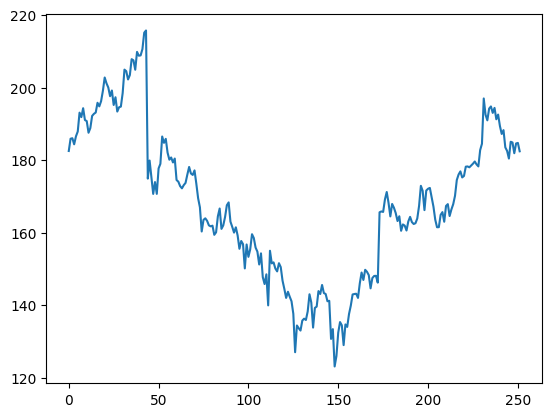

In [ ]:
#Compilam RNN
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Antrenam RNN
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

#importam setul de date de testare si le transformam in Numpy array
test_data = pd.read_csv("FB.csv")
test_data = test_data.iloc[:, 1].values

#Verificam forma setului
print(test_data.shape)
plt.plot(test_data)

In [ ]:
#cream date de antrenare si testare nescalate( nenormalizate)
unscaled_training_data = pd.read_csv('FB.csv')
unscaled_test_data = pd.read_csv('FB_test_data (1).csv')

#Concatenam seturile pe coloana "Open"
all_data = pd.concat((unscaled_training_data['Open'], unscaled_test_data['Open']), axis = 0)
print(all_data.shape)
#Cream x_test_data cu fiecare zi din luna Ian +40 de zile inainte
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values
x_test_data = np.reshape(x_test_data, (-1, 1))

print(x_test_data.shape)
#Scalare set de date
x_test_data = scaler.transform(x_test_data)
print(x_test_data[0])

(273,)
(19, 1)
[0.90261279]


In [ ]:
#Groupam datele de testare 
final_x_test_data = []
for i in range(40, len(x_test_data)):
  final_x_test_data.append(x_test_data[i-40:i, 0])
print(final_x_test_data[0])
final_x_test_data = np.array(final_x_test_data)
print("Ca Numpy array\n", final_x_test_data[0])
#Reformare NumPy array pentru Tensor Flow
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0],
                                                   final_x_test_data.shape[1],
                                                   1))

print(final_x_test_data.shape)
print(type(final_x_test_data))

IndexError: ignored

In [ ]:
#Generam valorile previzionate
predictions = rnn.predict(final_x_test_data)
#Afisam datele previzionate
plt.clf() #Stergem din canvas plotarea veche
plt.plot(prediction, color="green")

In [ ]:
#Facem scalare valori previzionate si plotam
unscaled_predictions = scaler.inverse_transform(predictions)
plt.clf()
plt.plot(unscaled_predictions, color="red")
plt.title('Date previzionate nenormalizate')


In [ ]:
plt.clf()
#Datele reale
plt.plot(test_data, color = 'blue')
plt.title('Date reale')

In [ ]:
plt.clf()
plt.plot(test_data, color = 'blue')
plt.plot(unscaled_predictions, colors="red")
plt.title('Comparatie')

In [ ]:
#Generam valorile previzionate
predictions = rnn.predict(final_x_test_data)
predictions = predictions + 0.03
#Afisam datele previzionate
plt.clf() #Stergem din canvas plotarea veche
plt.plot(predictions, color = "green")

In [ ]:
plt.clf()
plt.plot(test_data, color = 'blue')
plt.plot(unscaled_predictions, colors="red")
plt.title('Comparatie')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

#initializam RNN
rnn = Sequential()

#adaugam primul start LSTM
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1 )))

#facem o regularizare dropout
rnn.add(Dropout(0.2))

#Adaugam inca 3 straturi LSTM cu regularizare
for i in [True, True, False]:
  rnn.add(LSTM(units = 45, return_sequences = i))
  rnn.add(Dropout(0.2))

#Adaugam stratul de iesire
rnn.add(Dense(units = 1))


In [ ]:
#Compilam RNN
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Antrenam RNN
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

#importam setul de date de testare si le transformam in Numpy array
test_data = pd.read_csv("FB.csv")
test_data = test_data.iloc[:, 1].values

#Verificam forma setului
print(test_data.shape)
plt.plot(test_data)